In [1]:
from utils import download_history
from techical_indicators import RSI

import matplotlib.pyplot as plt

In [8]:
data = download_history('NOD.OL', start='2023-10-27', end=None, period='3mo', interval='60m')

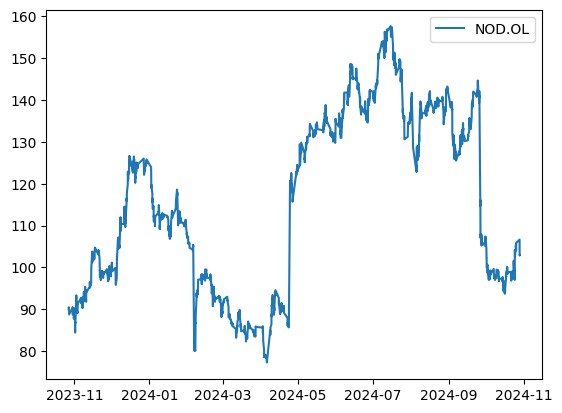

In [9]:
plt.plot(data['Close'])
plt.legend(['NOD.OL'])

In [10]:
rsi = RSI(data['Close'], 14).calculate_rsi()
print(rsi)

49.45354011706187
